<a href="https://colab.research.google.com/github/BenMeehan/Foundational_Machine_Learning/blob/main/Foundational_ML_and_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Amazon Fine Food Reviews Dataset**

https://www.kaggle.com/snap/amazon-fine-food-reviews

Objective : Predict whether the review is positive or negative using the given features.

**Loading data directly from Kaggle**

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download snap/amazon-fine-food-reviews

 99% 239M/242M [00:01<00:00, 175MB/s]
100% 242M/242M [00:01<00:00, 168MB/s]


In [ ]:
! unzip amazon-fine-food-reviews.zip

Archive:  amazon-fine-food-reviews.zip
  inflating: Reviews.csv             
  inflating: database.sqlite         
  inflating: hashes.txt              


In [ ]:
!pwd

/content


**Data is available in the content directory**

---



# **Loading the data using Sqllite3 and Pandas**

In [ ]:
import numpy as np
import pandas as pd
import sqlite3

con=sqlite3.connect(r"database.sqlite")
df=pd.read_sql_query("SELECT * FROM Reviews WHERE Score != 3",con)

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Replace Score column with postive or negative (val<3)

In [ ]:
def replace(val):
  if val<3:
    return 'Negative'
  else:
    return 'Positive' 

score_col=df['Score']
modified_score=score_col.map(replace)

In [ ]:
modified_score

0         Positive
1         Negative
2         Positive
3         Negative
4         Positive
            ...   
525809    Positive
525810    Negative
525811    Positive
525812    Positive
525813    Positive
Name: Score, Length: 525814, dtype: object

In [ ]:
df['Score']=modified_score

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,Positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,Negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,Positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,Negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,Positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Cleaning the data

*Tip to self: Always clean your data*

**Garbage in, Garbage out.**

In [ ]:
#Checking if any reviews are duplicated
pd.read_sql_query("select *,count(*) from Reviews group by Summary,Text having count(*)>1",con)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,count(*)
0,426710,B00213EU7I,A129QMC08SW3T3,"C. Clinger ""CatMa""",4,5,5,1240012800,! Mmmmmmmmmm !,What a wonderful surprise to find LUCY's on Am...,6
1,482378,B0018KLPFK,APWCOAVILK94B,"Real Named Person ""wowzee""",2,2,5,1289952000,!!!!!!! Flavor review !!!!!!!!,"Best Flavor yet and instant favorite, cant sto...",4
2,542834,B000GB0TMW,A3MWYVPJ5X8MBH,Michael,0,0,5,1349568000,!st time matcha buyer,This is quality matcha tea at a very low price...,4
3,466145,B001E18K8S,AQ73BMYWH1EM8,Peter D. Mccorkle,39,47,5,1242518400,""" A MIRACLE SUPPLEMENT!!""",I'm a 32 year old man. Construction Electricia...,10
4,451886,B00004CXX9,A2D9OASHI47H73,Riolama,0,1,5,1318982400,"""Ach deliver me from LL Bean.""",This was my favorite movie as a kid and still ...,3
...,...,...,...,...,...,...,...,...,...,...,...
57410,514082,B001BETMEO,A2ID5QQ1ZF9R2W,"Mommy of Cuties M & Z ""Mom of Twins""",2,2,5,1290384000,~*~*~NO MORE URINARY TRACT INFECTIONS~*~*~,My cat is 10 years old and he used to get UTI'...,4
57411,500469,B003QNLUTI,A93LBTV617ZVC,"JJ2007 ""Blessed & Highly Favored!!""",0,0,5,1319932800,~Better Than Coffee~,"Having just purchased my next 12-pack of the ""...",4
57412,555048,B0000DJ7SW,A1SGWAO6PDKQ53,Female_Jedi_Master,1,1,5,1326412800,~Well received~,I purchased this to send as a gift and the rec...,5
57413,313751,B005OVPK9G,A37LNXZ3U8Z0PW,paranormal junkie,0,0,5,1337731200,~~perfect on-the-go snack~~,I had these sent to me at work so I shared and...,2


In [ ]:
# Checking for a user
pd.read_sql_query("Select * from Reviews where UserID='A3MWYVPJ5X8MBH'",con)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,41586,B000GB7RV8,A3MWYVPJ5X8MBH,Michael,0,0,5,1349568000,!st time matcha buyer,This is quality matcha tea at a very low price...
1,324587,B000GB0UGC,A3MWYVPJ5X8MBH,Michael,0,0,5,1349568000,!st time matcha buyer,This is quality matcha tea at a very low price...
2,411645,B000GB3NS4,A3MWYVPJ5X8MBH,Michael,0,0,5,1349568000,!st time matcha buyer,This is quality matcha tea at a very low price...
3,542834,B000GB0TMW,A3MWYVPJ5X8MBH,Michael,0,0,5,1349568000,!st time matcha buyer,This is quality matcha tea at a very low price...


Micheal seems to have same review for different products at the same timestamp (!impossible)

In [ ]:
# Removing duplicates
filtered_df=df.drop_duplicates(subset=['UserId','Time','Summary','Text'])

In [ ]:
filtered_df.shape

(365293, 10)

In [ ]:
df.shape

(525814, 10)

In [ ]:
(filtered_df.shape[0]/df.shape[0])*100

69.47190451376343

**About 30 percent of the data was duplicated**

In [ ]:
# Helpfulness Denominater= Helpfulness Numerator + not helpful
# hence helpfulness numerator should be <= helpfulness denominator

pd.read_sql_query("Select * from Reviews where HelpfulnessNumerator > HelpfulnessDenominator",con)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
1,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [ ]:
final_df=filtered_df[filtered_df['HelpfulnessNumerator']<=filtered_df['HelpfulnessDenominator']]

In [ ]:
final_df.shape

(365291, 10)

# **Words to Vector**

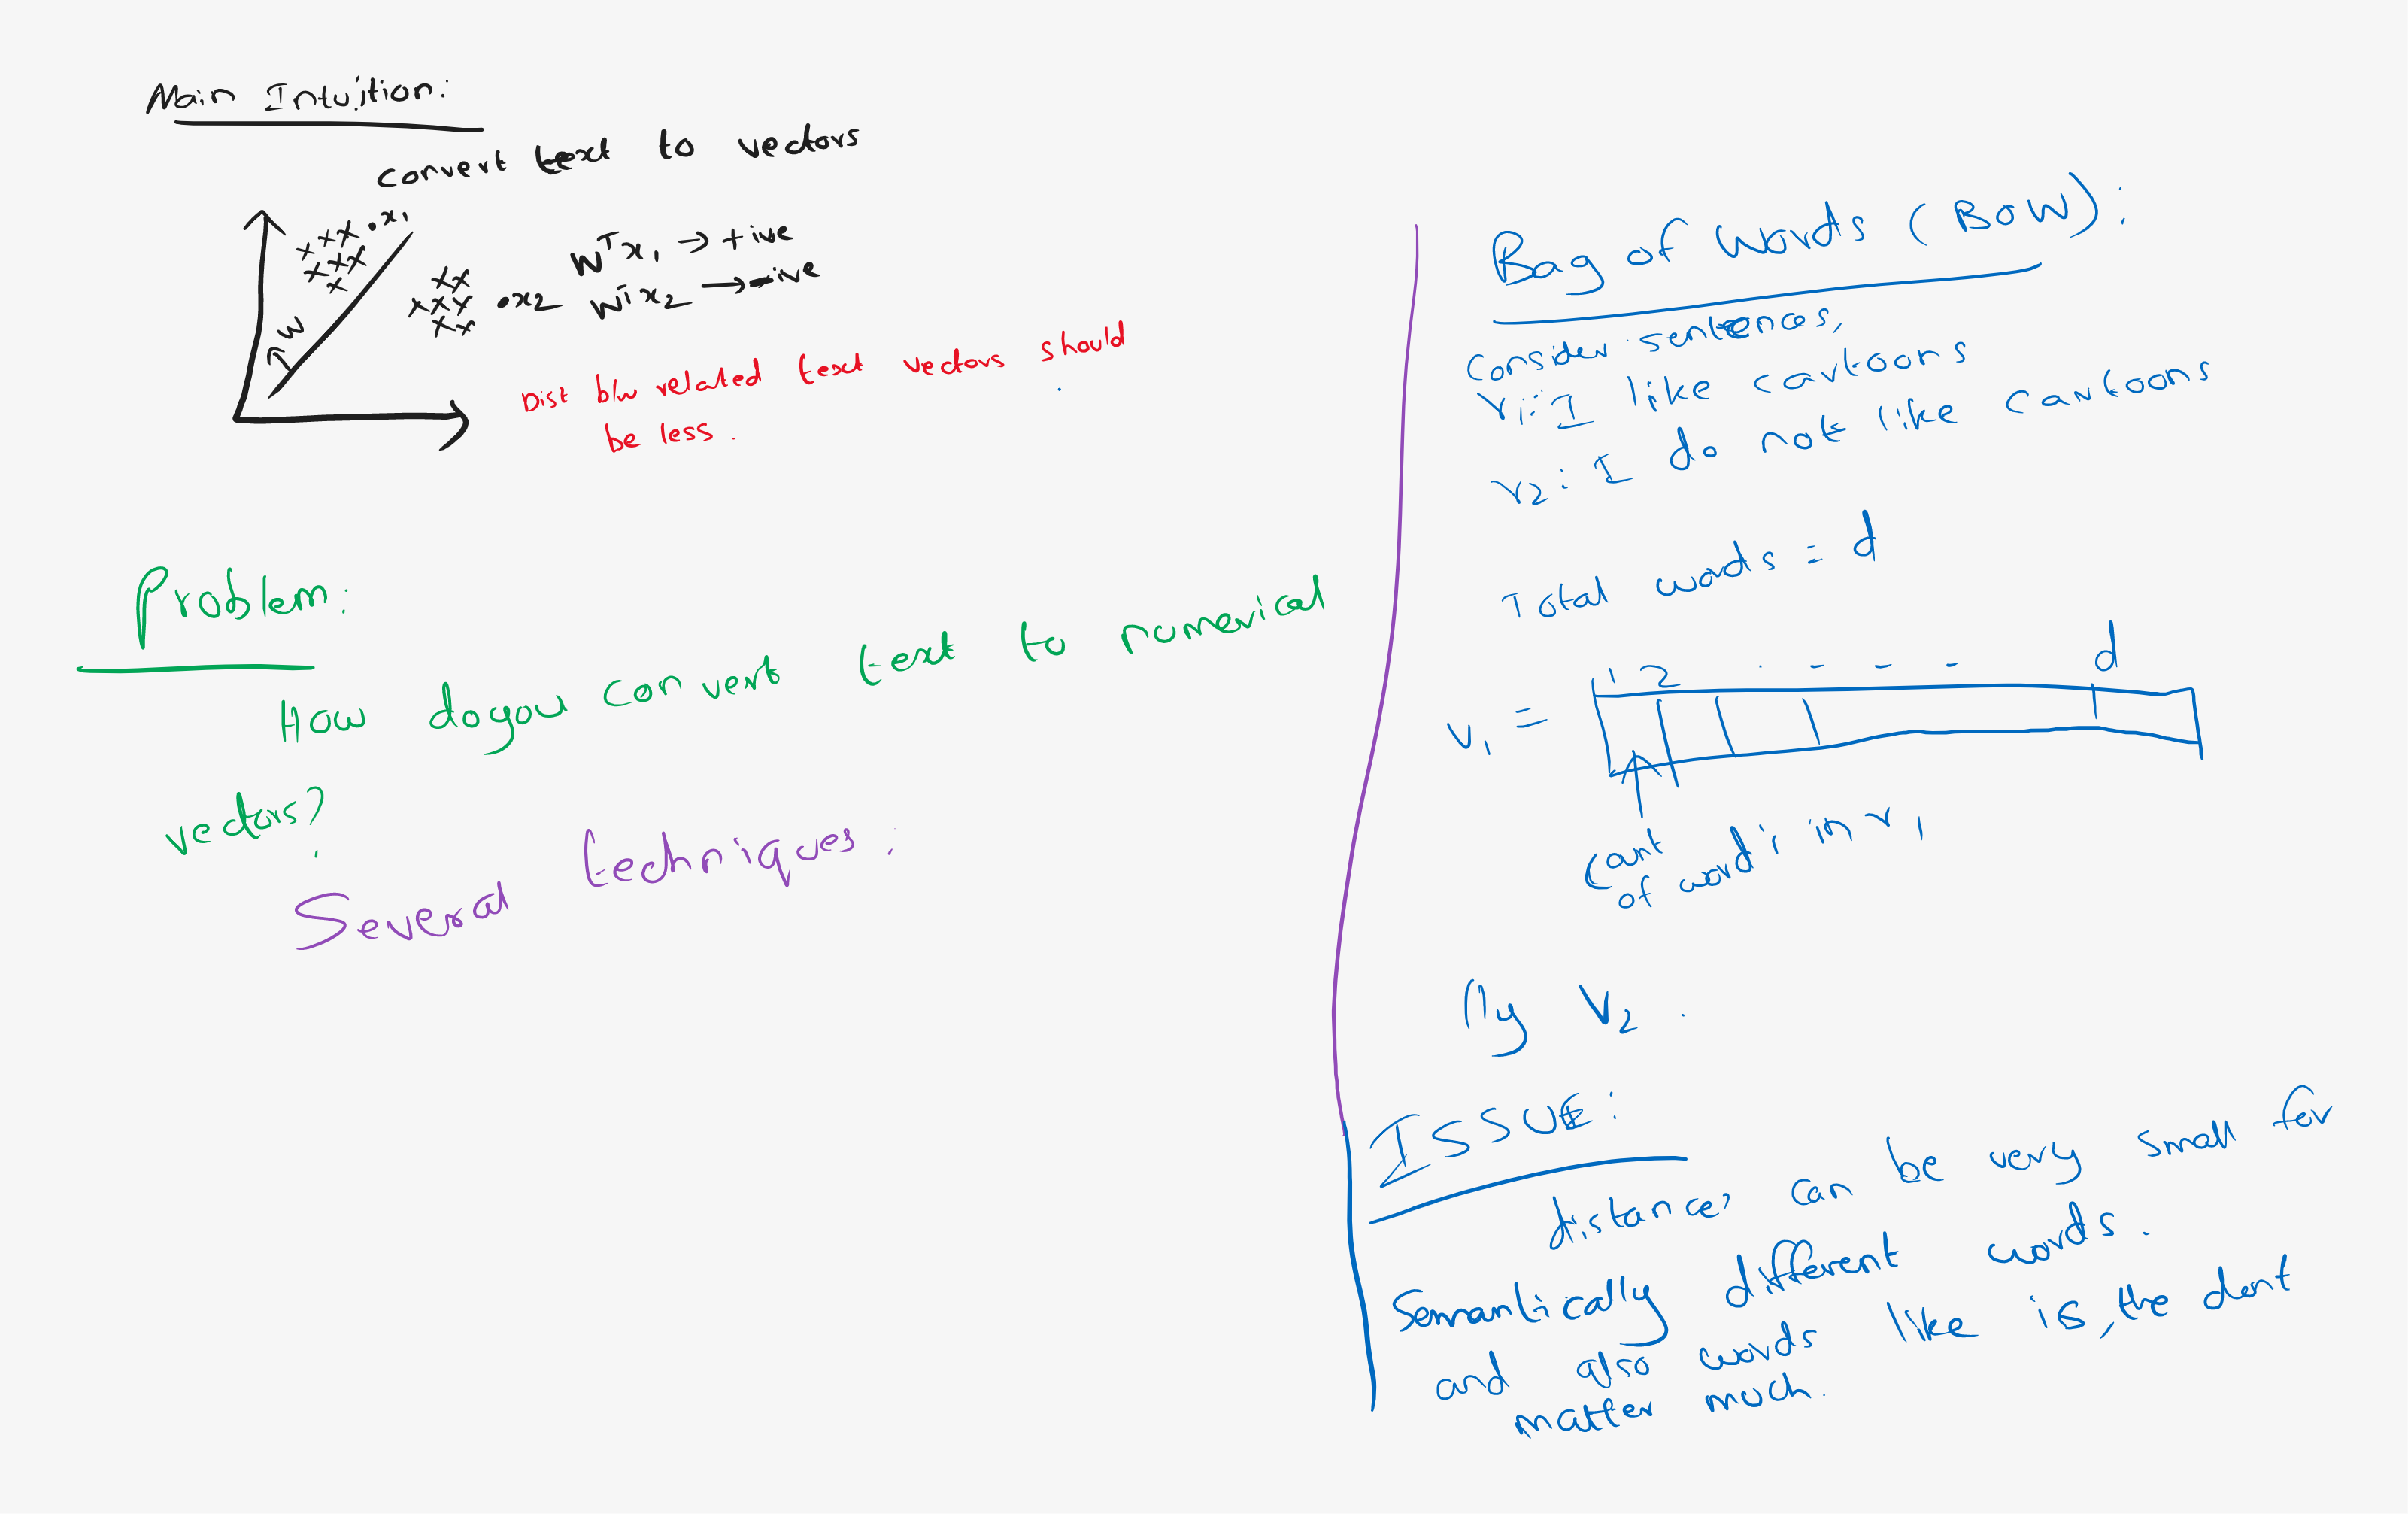

https://stackoverflow.com/questions/1787110/what-is-the-difference-between-lemmatization-vs-stemming
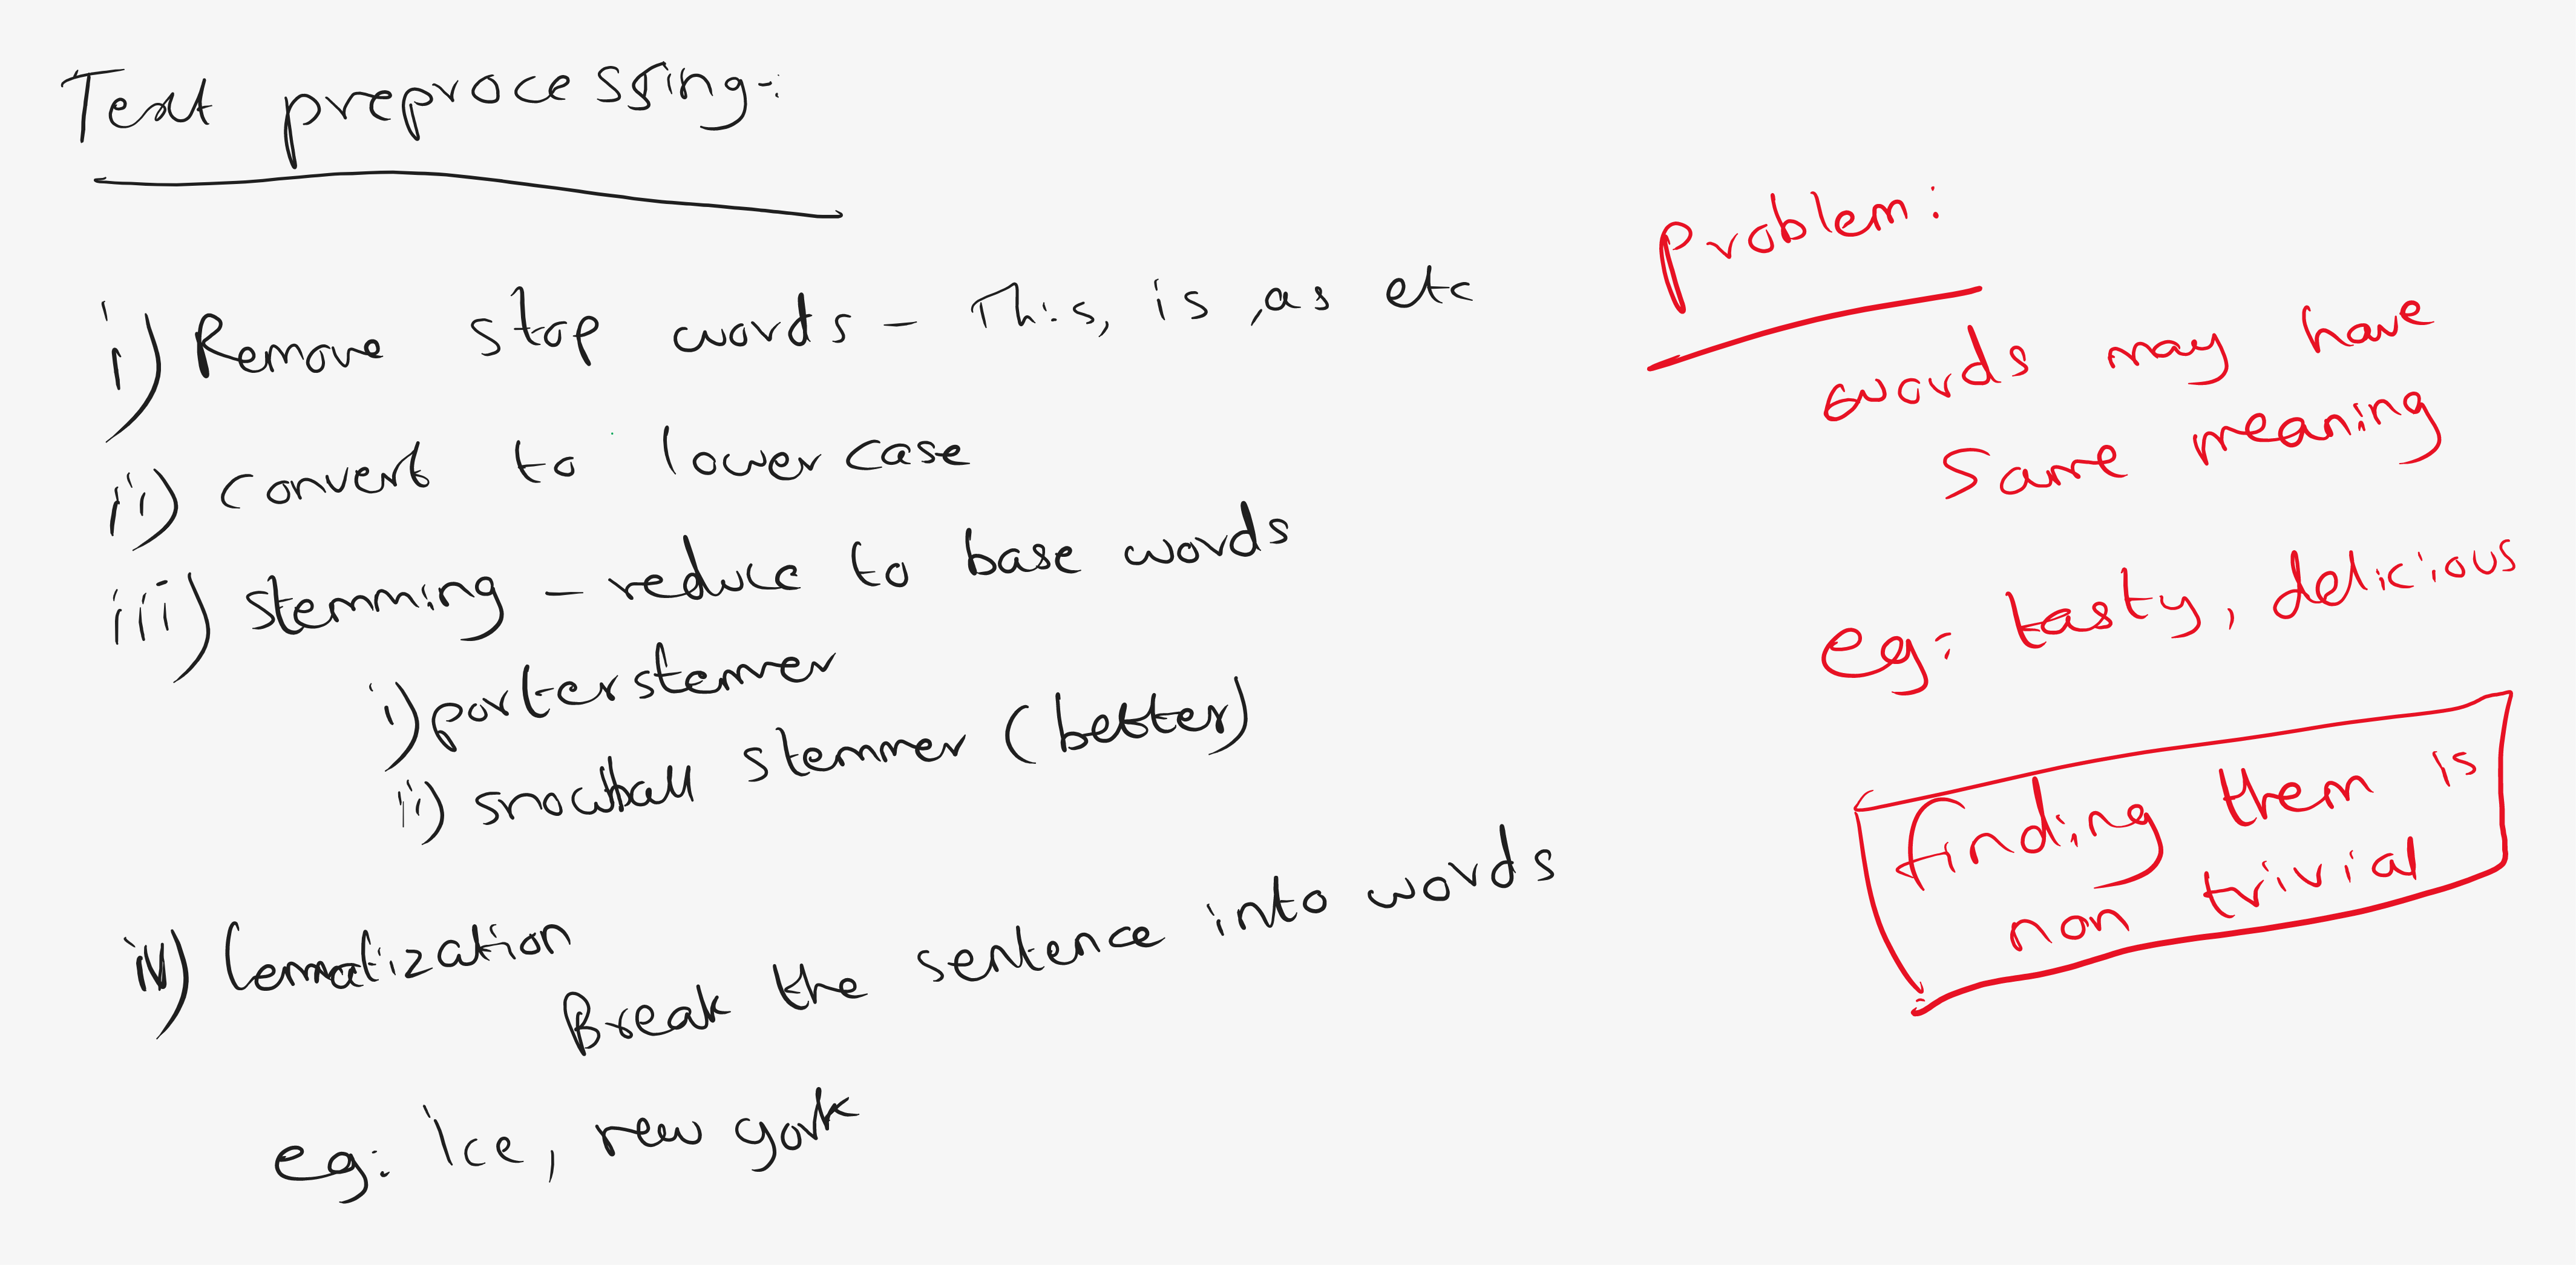

**n-grams**

unigrams - one word per dimension in corpus
bigrams - two words
trigrams-  three words 

These can help solve the problem of losing meaning while by using unigrams. But at the cost of higher dimensions

ie., no of trigrams > no of bigrams > no of unigrams

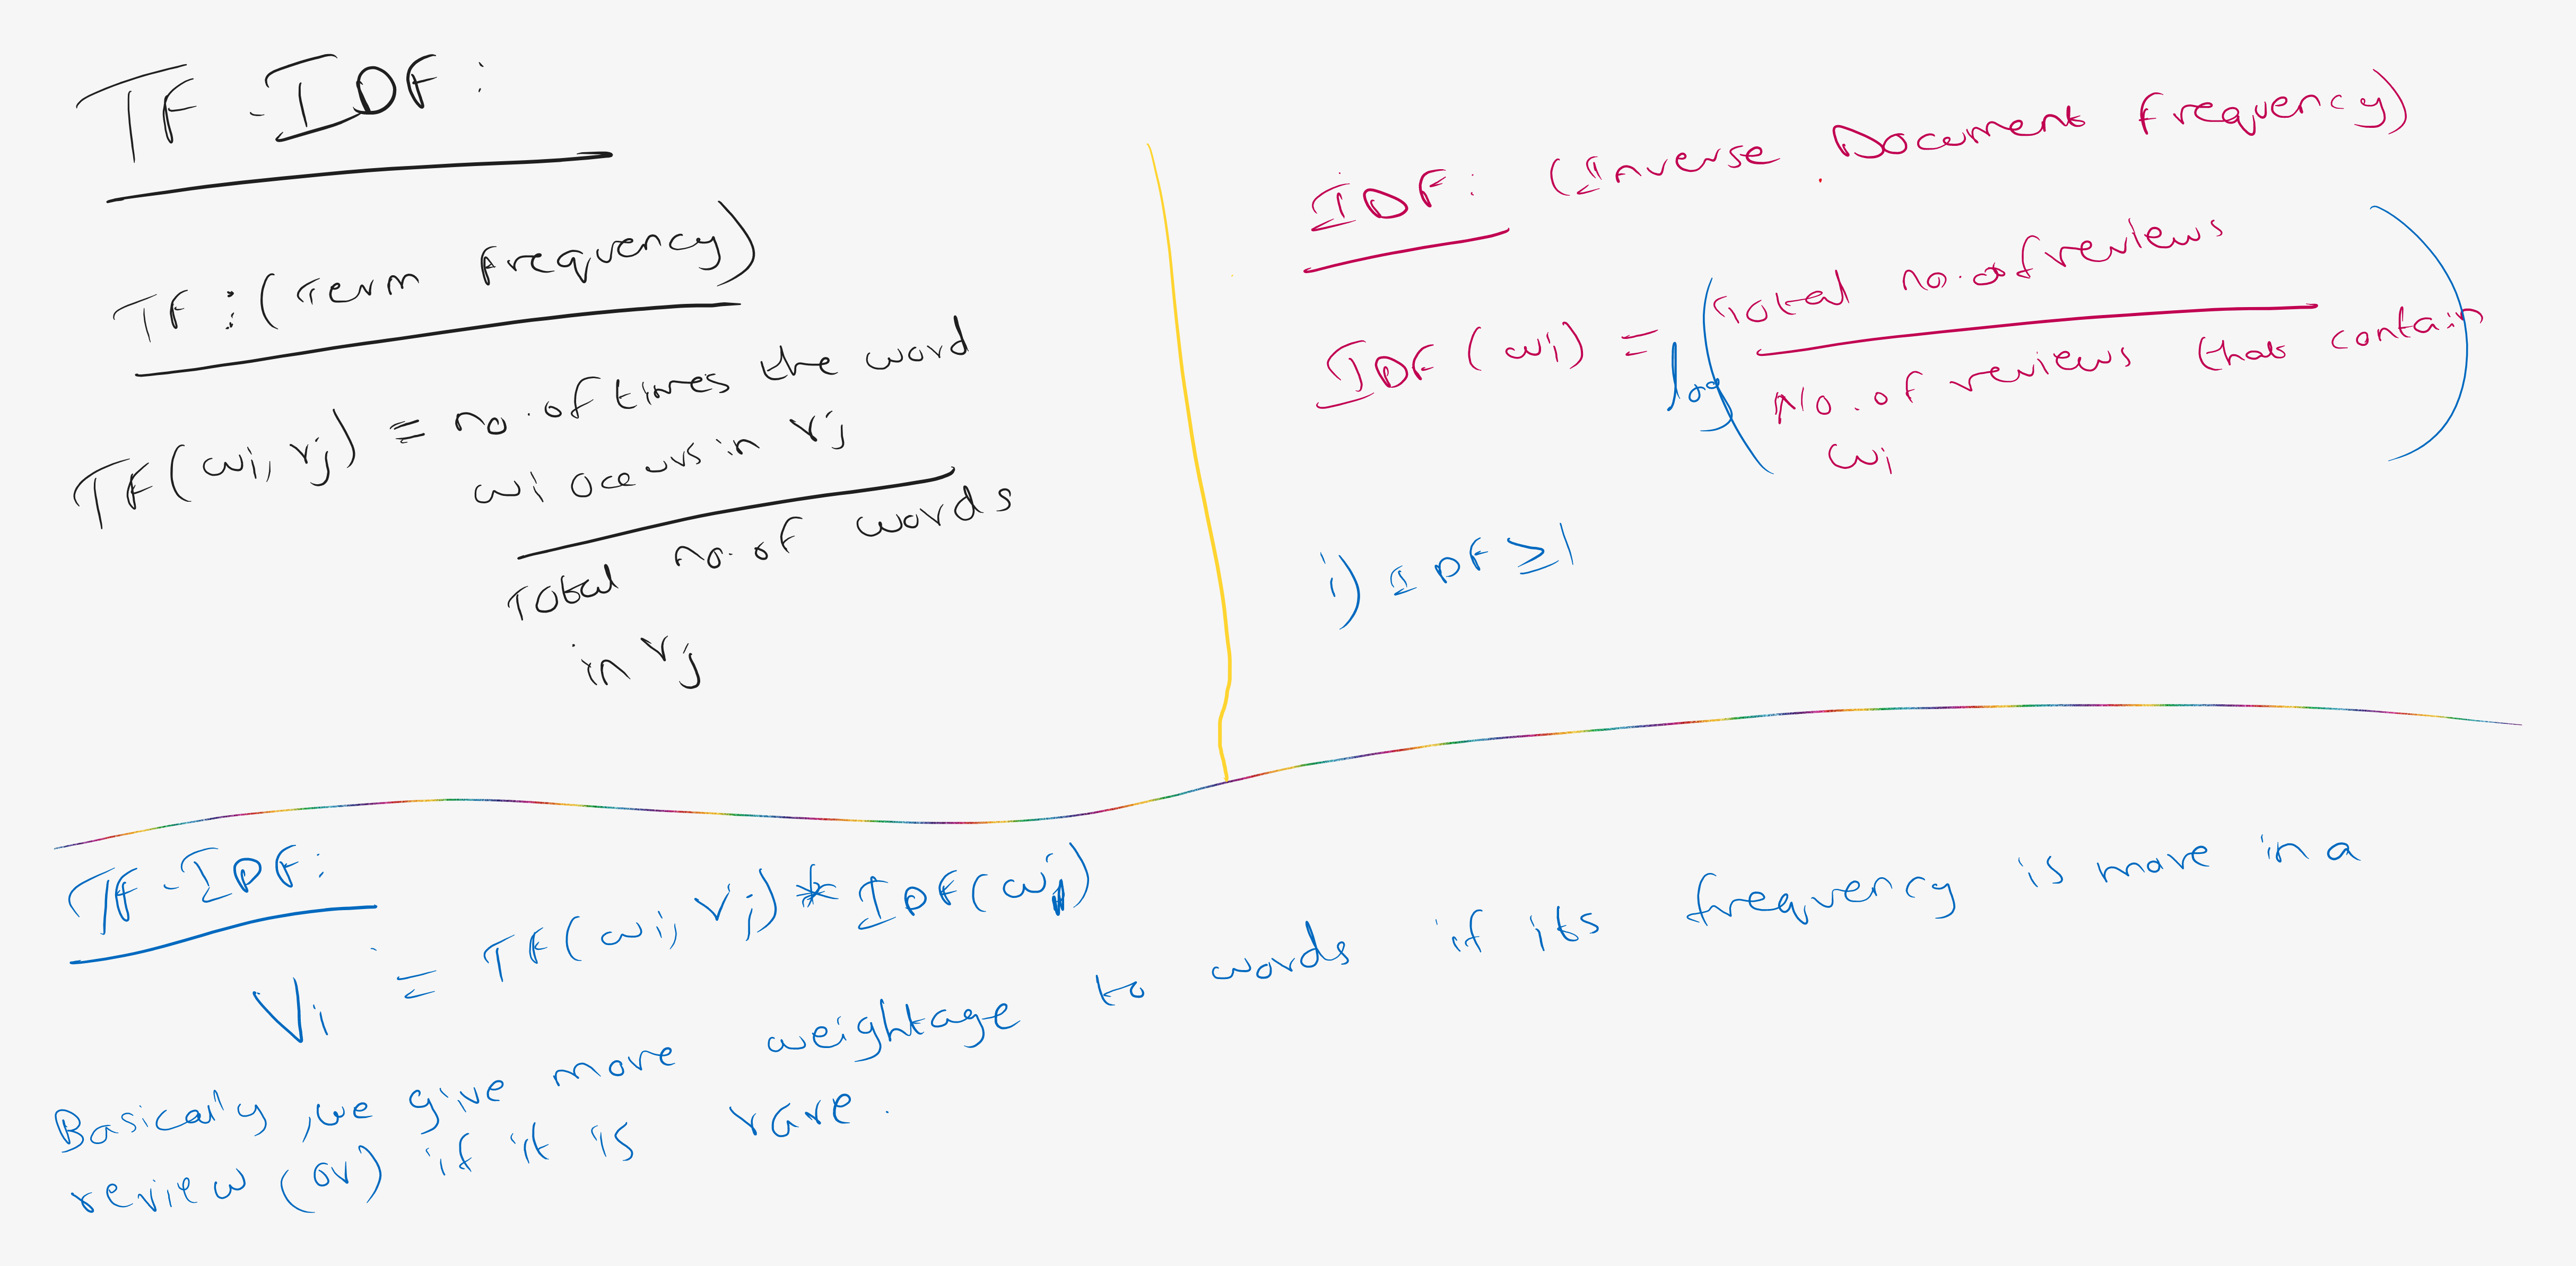